# Linear models

#### Author: Anna Vaughan
#### Last modified: 27/2/2020

In [29]:
# Import libraries
from helper_functions import *
import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import Lasso

# Read in data
data_heating, data_cooling, target_heating_elec, target_cooling_elec = read_in_hc_data()

# Normalise the targets by floorspace
target_heating_norm = target_heating_elec/data_heating['SQFT']
target_cooling_norm = target_cooling_elec/data_cooling['SQFT']

# Scale the features
sc = StandardScaler()
#sc_data_heating = sc.fit_transform(data_heating)
#sc_data_cooling = sc.fit_transform(data_cooling)
#target_heating_norm = sc.transform(target_heating_norm.reshape(-1, 1))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/Users/anna/Desktop/MRes/team_challenge/helper_functions.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_heating.dropna(inplace = True)
/Users/anna/Desktop/MRes/team_challenge/helper_functions.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [39]:
# Select the office buildings
target_heating_norm = target_heating_norm[data_heating['PBA']==5]
data_heating = data_heating[data_heating['PBA']==5]
sc_data_heating = sc.fit_transform(data_heating)
#sc_data_cooling = sc.fit_transform(data_cooling)

ValueError: Found array with 0 sample(s) (shape=(0, 81)) while a minimum of 1 is required by StandardScaler.

(53,)

## Lasso regression - heating

In [31]:
# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(sc_data_heating,target_heating_norm, test_size=0.2, random_state=31)

In [32]:
alphas = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.8]
scores = []
num_coeffs = []
for current_alpha in alphas:
    lasso = Lasso(alpha = current_alpha)
    lasso.fit(X_train,y_train)
    test_score=lasso.score(X_test,y_test)
    coeff_used = np.sum(lasso.coef_!=0)
    scores.append(test_score)
    num_coeffs.append(coeff_used)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.8498587688376, tolerance: 2.3188750056065
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.56029871576422, tolerance: 2.3188750056065
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.15779662273576, tolerance: 2.3188750056065
  positive)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_coor

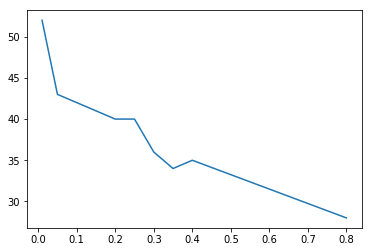

In [33]:
plt.plot(alphas,num_coeffs)
plt.show()

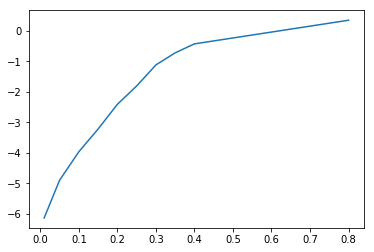

In [34]:
plt.plot(alphas,scores)
plt.show()

So the best is $\alpha = 0.15$, with 33 predictors and an $R^{2} = 0.25$ value of 

In [26]:
# Fit this model
lasso = Lasso(alpha = 0.15)
lasso.fit(X_train,y_train)
test_score = lasso.score(X_test,y_test)
coefs = lasso.coef_
inc_predictors = data_heating.keys()[coefs!=0]

## Lasso regression - cooling

In [27]:
# Split into test and training
X_train, X_test, y_train, y_test = train_test_split(sc_data_cooling,target_cooling_norm, test_size=0.2, random_state=31)

In [14]:
alphas = np.linspace(0.0001, 1.8, 100)
scores = []
num_coeffs = []
for current_alpha in alphas:
    lasso = Lasso(alpha = current_alpha)
    lasso.fit(X_train,y_train)
    test_score=lasso.score(X_test,y_test)
    coeff_used = np.sum(lasso.coef_!=0)
    scores.append(test_score)
    num_coeffs.append(coeff_used)

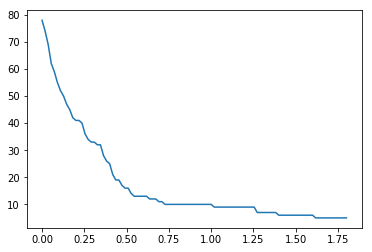

In [15]:
plt.plot(alphas,num_coeffs)
plt.show()

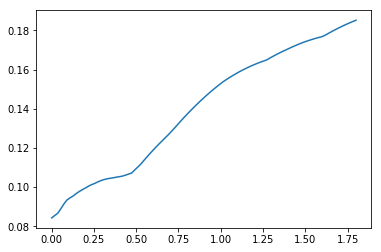

In [16]:
plt.plot(alphas,scores)
plt.show()

In [17]:
# Fit this model
lasso = Lasso(alpha = 4)
lasso.fit(X_train,y_train)
test_score = lasso.score(X_test,y_test)
coefs = lasso.coef_
inc_predictors = data_cooling.keys()[coefs!=0]